## How are in demand skills trending for Data Scienstist ?


#### Methology

##### 1. Aggregate Skills counts
##### 2. Re-Analyze based on percentage of total Jobs
##### 3. plot the monthly skill demand

In [1]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
# loading Data
dataset= load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']= df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter For Data Scientist Data
#df_DS= df[df["job_title_short"]=="Data Scientist"].copy()

In [3]:
df_DS_Pak =df[(df["job_title"]== 'Data Scientist')   & (df['job_country']== "Pakistan")].copy()

In [4]:
df_DS_Pak['job_posted_month']=df_DS_Pak["job_posted_date"].dt.month

In [5]:
df_DS_Pak_explode=df_DS_Pak.explode('job_skills')

In [17]:
df_DS_Pak_pivot=df_DS_Pak_explode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc="size", fill_value=0)

df_DS_Pak_pivot.loc['Total']=df_DS_Pak_pivot.sum()

df_DS_Pak_pivot=df_DS_Pak_pivot[df_DS_Pak_pivot.loc['Total'].sort_values(ascending=False).index]

df_DS_Pak_pivot=df_DS_Pak_pivot.drop('Total')

df_DS_Pak_pivot

job_skills,python,sql,r,hadoop,tableau,java,pandas,pytorch,spark,scikit-learn,...,ovh,laravel,golang,ggplot2,django,digitalocean,databricks,c#,c,word
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,25,21,13,9,12,11,7,0,2,1,...,0,1,0,0,1,0,0,0,0,1
2,7,6,4,2,1,5,2,0,2,0,...,0,0,0,0,0,1,0,0,1,0
3,5,6,3,3,2,1,1,2,2,1,...,0,0,1,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,5,3,2,1,0,3,2,2,3,...,0,0,0,0,0,0,0,0,0,0
6,7,10,5,6,0,1,2,3,3,3,...,0,0,0,0,0,0,0,0,0,0
7,3,3,2,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,3,1,0,0,0,3,3,0,3,...,0,0,0,0,0,0,0,0,0,0
9,9,7,5,2,5,2,2,4,2,3,...,0,0,0,1,0,0,1,0,0,0


In [39]:
DS_totals=df_DS_Pak.groupby('job_posted_month').size()


In [40]:
df_DS_Pak_percent=df_DS_Pak_pivot.div(DS_totals/100,axis=0)

In [41]:
df_DS_Pak_percent

job_skills,python,sql,r,hadoop,tableau,java,pandas,pytorch,spark,scikit-learn,...,ovh,laravel,golang,ggplot2,django,digitalocean,databricks,c#,c,word
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,89.285714,75.000000,46.428571,32.142857,42.857143,39.285714,25.000000,0.000000,7.142857,3.571429,...,0.000000,3.571429,0.0,0.000000,3.571429,0.000000,0.000000,0.000000,0.000000,3.571429
2,100.000000,85.714286,57.142857,28.571429,14.285714,71.428571,28.571429,0.000000,28.571429,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,14.285714,0.000000,0.000000,14.285714,0.000000
3,50.000000,60.000000,30.000000,30.000000,20.000000,10.000000,10.000000,20.000000,20.000000,10.000000,...,0.000000,0.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,50.000000,50.000000,50.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,85.714286,71.428571,42.857143,28.571429,14.285714,0.000000,42.857143,28.571429,28.571429,42.857143,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,46.666667,66.666667,33.333333,40.000000,0.000000,6.666667,13.333333,20.000000,20.000000,20.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,75.000000,75.000000,50.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,100.000000,75.000000,25.000000,0.000000,0.000000,0.000000,75.000000,75.000000,0.000000,75.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,64.285714,50.000000,35.714286,14.285714,35.714286,14.285714,14.285714,28.571429,14.285714,21.428571,...,0.000000,0.000000,0.0,7.142857,0.000000,0.000000,7.142857,0.000000,0.000000,0.000000


In [42]:
# Changes month number to month names
df_DS_Pak_percent=df_DS_Pak_percent.reset_index()
df_DS_Pak_percent['job_posted_month']=df_DS_Pak_percent['job_posted_month'].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%b'))
df_DS_Pak_percent=df_DS_Pak_percent.set_index('job_posted_month')
df_DS_Pak_percent=df_DS_Pak_percent.drop(columns='job_posted_month')

KeyError: "['job_posted_month'] not found in axis"

In [43]:
df_DS_Pak_percent

job_skills,python,sql,r,hadoop,tableau,java,pandas,pytorch,spark,scikit-learn,...,ovh,laravel,golang,ggplot2,django,digitalocean,databricks,c#,c,word
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,89.285714,75.000000,46.428571,32.142857,42.857143,39.285714,25.000000,0.000000,7.142857,3.571429,...,0.000000,3.571429,0.0,0.000000,3.571429,0.000000,0.000000,0.000000,0.000000,3.571429
Feb,100.000000,85.714286,57.142857,28.571429,14.285714,71.428571,28.571429,0.000000,28.571429,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,14.285714,0.000000,0.000000,14.285714,0.000000
Mar,50.000000,60.000000,30.000000,30.000000,20.000000,10.000000,10.000000,20.000000,20.000000,10.000000,...,0.000000,0.000000,10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,50.000000,50.000000,50.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,85.714286,71.428571,42.857143,28.571429,14.285714,0.000000,42.857143,28.571429,28.571429,42.857143,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,46.666667,66.666667,33.333333,40.000000,0.000000,6.666667,13.333333,20.000000,20.000000,20.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,75.000000,75.000000,50.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,100.000000,75.000000,25.000000,0.000000,0.000000,0.000000,75.000000,75.000000,0.000000,75.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,64.285714,50.000000,35.714286,14.285714,35.714286,14.285714,14.285714,28.571429,14.285714,21.428571,...,0.000000,0.000000,0.0,7.142857,0.000000,0.000000,7.142857,0.000000,0.000000,0.000000


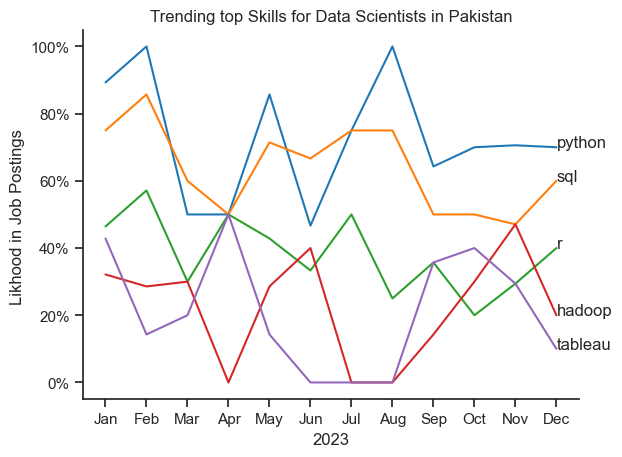

In [57]:
df_plot_pak=df_DS_Pak_percent.iloc[: , :5]

sns.lineplot(data=df_plot_pak ,legend="full" , dashes=False , palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title("Trending top Skills for Data Scientists in Pakistan")
plt.ylabel("Likhood in Job Postings ")
plt.xlabel("2023")
plt.legend().remove()


from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range (5):
    plt.text(11, df_plot_pak.iloc[-1, i], df_plot_pak.columns[i])